# MNIST Handwritten Digits Classification - IMPROVED VERSION

This notebook demonstrates proper training practices for a neural network classifier.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

2026-01-03 20:21:36.764761: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 2. Load and Explore Data

In [2]:
input_data = pd.read_csv('train.csv')
print(f"Dataset shape: {input_data.shape}")
print(f"Total samples: {len(input_data)}")
input_data.head()

Dataset shape: (42000, 785)
Total samples: 42000


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check class distribution

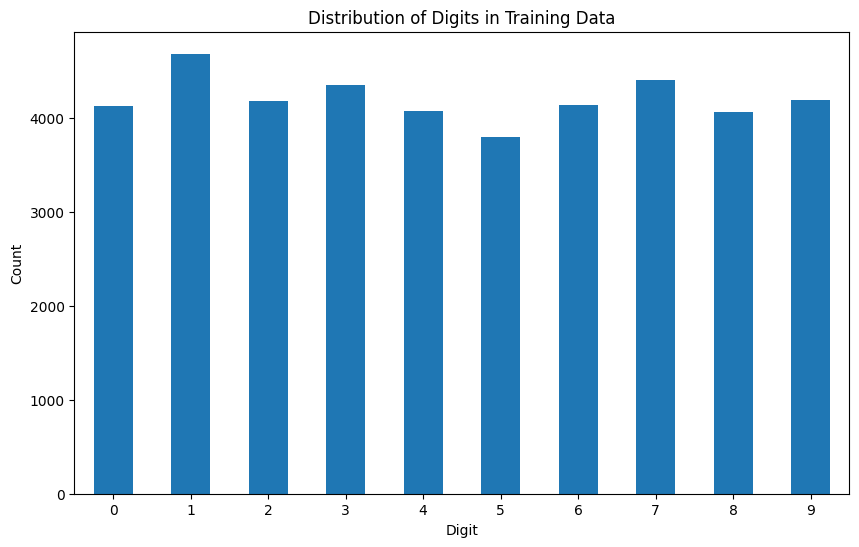


Class distribution:
label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(10, 6))
input_data['label'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Digits in Training Data')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print("\nClass distribution:")
print(input_data['label'].value_counts().sort_index())

### Visualize Sample Images

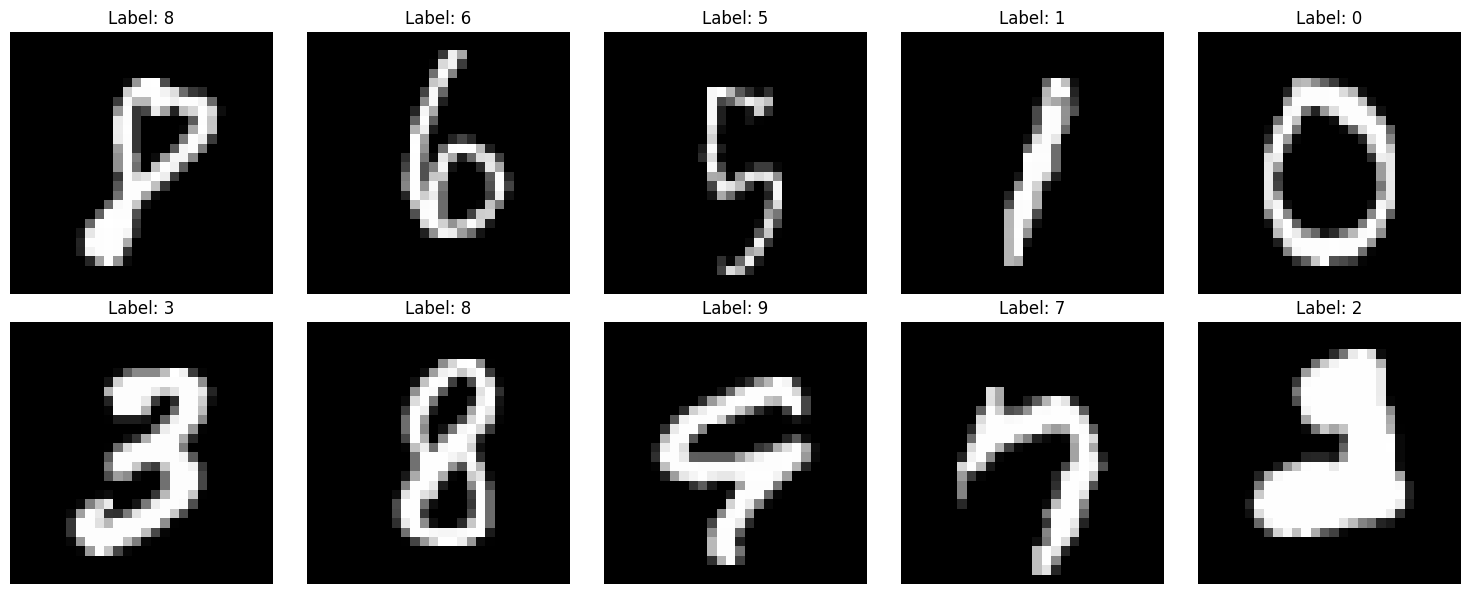

In [4]:
# Display 10 random samples
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(input_data))
    image = input_data.iloc[idx, 1:].values.reshape(28, 28)
    label = input_data.iloc[idx, 0]
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## 3. Prepare Data

Key improvements:
- **Separate features (X) and labels (y)**
- **Normalize pixel values to [0, 1] range**
- **Create train/validation split**
- **One-hot encode labels**

In [5]:
# Separate features and labels
y = input_data['label']
X = input_data.drop('label', axis=1)

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (42000, 784)
Labels shape: (42000,)


In [6]:
# FIX #1: Normalize pixel values from [0, 255] to [0, 1]
# This significantly improves training speed and model performance
X = X / 255.0

print(f"Pixel value range after normalization: [{X.min().min()}, {X.max().max()}]")

Pixel value range after normalization: [0.0, 1.0]


In [7]:
# FIX #2: Create train/validation split (80/20)
# This allows us to monitor overfitting during training
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")

Training samples: 33600
Validation samples: 8400


In [8]:
# One-hot encode labels
y_train_encoded = pd.get_dummies(y_train)
y_val_encoded = pd.get_dummies(y_val)

print(f"One-hot encoded labels shape: {y_train_encoded.shape}")
print(f"Sample encoding for label {y_train.iloc[0]}:")
print(y_train_encoded.iloc[0].values)

One-hot encoded labels shape: (33600, 10)
Sample encoding for label 2:
[False False  True False False False False False False False]


## 4. Build the Model

Key improvements:
- **Softmax activation** on output layer (not sigmoid)
- **Dropout layers** to prevent overfitting
- **Proper architecture** for the task

In [9]:
# Create classifier
classifier = Sequential()

# Input layer + First hidden layer
classifier.add(Dense(units=512, activation='relu', kernel_initializer='he_uniform', input_dim=784))
classifier.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second hidden layer
classifier.add(Dense(units=256, activation='relu', kernel_initializer='he_uniform'))
classifier.add(Dropout(0.2))

# Third hidden layer
classifier.add(Dense(units=128, activation='relu', kernel_initializer='he_uniform'))
classifier.add(Dropout(0.1))

# FIX #3: Output layer with SOFTMAX activation (not sigmoid)
# Softmax ensures outputs sum to 1 and represent true probabilities
classifier.add(Dense(units=10, activation='softmax', kernel_initializer='glorot_uniform'))

classifier.summary()

/home/reagan/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

## 5. Compile the Model

Key improvements:
- **Adam optimizer** instead of basic SGD
- **Categorical crossentropy** loss (not MSE)
- **Additional metrics** for monitoring

In [10]:
# FIX #4: Use Adam optimizer (adaptive learning rate)
# FIX #5: Use categorical_crossentropy loss for multi-class classification
classifier.compile(
    optimizer='adam',  # Much better than basic SGD
    loss='categorical_crossentropy',  # Correct loss for multi-class classification
    metrics=['accuracy']  # Track accuracy during training
)

print("Model compiled successfully!")

Model compiled successfully!


## 6. Train the Model

Key improvements:
- **Larger batch size** (128 instead of 10)
- **More epochs** with validation monitoring
- **Validation data** to track overfitting

In [11]:
# FIX #6: Use appropriate batch size (128 instead of 10)
# FIX #7: Train for more epochs (20 instead of 10)
# FIX #8: Use validation data to monitor overfitting

history = classifier.fit(
    X_train, 
    y_train_encoded,
    batch_size=128,  # Better than batch_size=10
    epochs=20,       # More training time
    validation_data=(X_val, y_val_encoded),  # Monitor validation performance
    verbose=1
)

Epoch 1/20


2026-01-03 20:23:43.717065: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 105369600 exceeds 10% of free system memory.


262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7850 - loss: 0.6845

2026-01-03 20:23:47.573657: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 26342400 exceeds 10% of free system memory.


263/263 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8836 - loss: 0.3790 - val_accuracy: 0.9536 - val_loss: 0.1537
Epoch 2/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9549 - loss: 0.1468 - val_accuracy: 0.9606 - val_loss: 0.1258
Epoch 3/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9684 - loss: 0.1017 - val_accuracy: 0.9708 - val_loss: 0.0955
Epoch 4/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9757 - loss: 0.0791 - val_accuracy: 0.9725 - val_loss: 0.0943
Epoch 5/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9809 - loss: 0.0613 - val_accuracy: 0.9729 - val_loss: 0.0874
Epoch 6/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9839 - loss: 0.0495 - val_accuracy: 0.9719 - val_loss: 0.0980
Epoch 7/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9849 - loss: 0.0472 - val_accuracy: 0.9742 - val_loss: 0.0869
Epoch 8/20
263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9869 - loss: 0.0383 - val_accuracy: 0.974

## 7. Visualize Training History

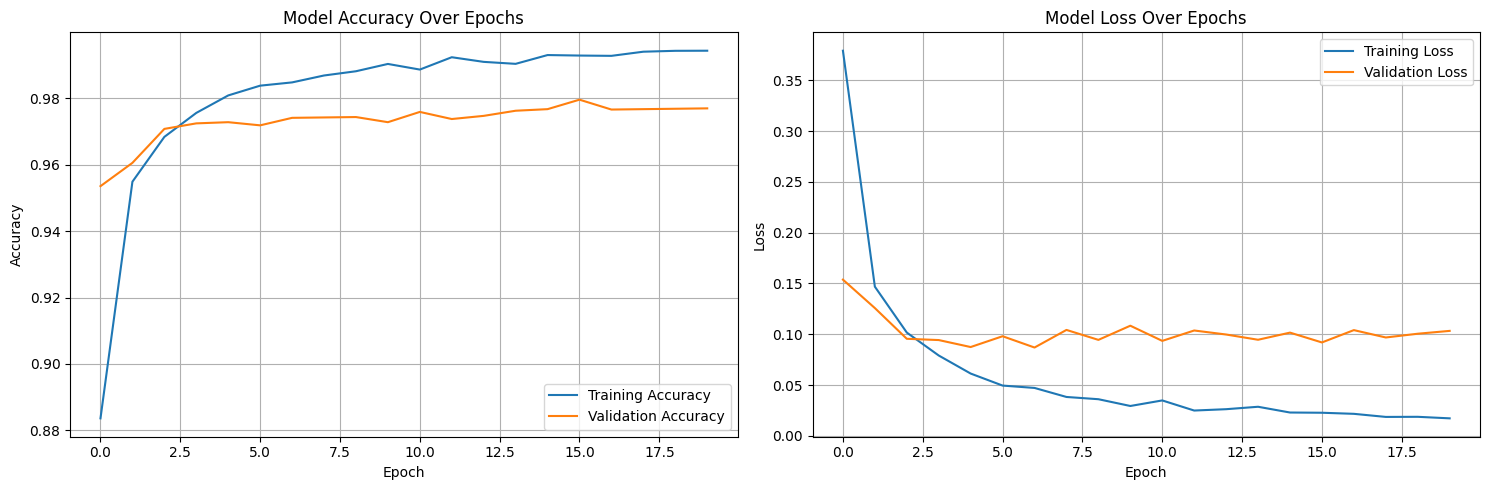


Final Training Accuracy: 0.9944
Final Validation Accuracy: 0.9770


In [12]:
# Plot training & validation accuracy
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"\nFinal Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

## 8. Evaluate on Validation Set

In [13]:
# Evaluate on validation set
val_loss, val_accuracy = classifier.evaluate(X_val, y_val_encoded, verbose=0)

print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

2026-01-03 20:25:22.012978: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 26342400 exceeds 10% of free system memory.


Validation Loss: 0.1033
Validation Accuracy: 0.9770
Validation Accuracy: 97.70%


In [14]:
# Make predictions on validation set
y_pred_probs = classifier.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_val.values

print(f"Predictions shape: {y_pred_probs.shape}")
print(f"\nSample prediction probabilities:")
print(y_pred_probs[0])
print(f"Predicted digit: {y_pred[0]}")
print(f"True digit: {y_true[0]}")

 56/263 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2026-01-03 20:25:29.590685: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 26342400 exceeds 10% of free system memory.


263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predictions shape: (8400, 10)

Sample prediction probabilities:
[1.7801155e-13 9.9999994e-01 3.3671362e-13 4.5436770e-15 1.2189717e-11
 3.0327081e-13 1.9999936e-11 1.6952872e-09 4.3833712e-10 4.9436193e-13]
Predicted digit: 1
True digit: 1


## 9. Classification Report and Confusion Matrix

In [15]:
# FIX #9: Proper evaluation with classification report
print("Classification Report:")
print("=" * 60)
print(classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)]))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       827
           1       0.98      0.99      0.99       937
           2       0.98      0.98      0.98       835
           3       0.98      0.97      0.98       870
           4       0.99      0.98      0.98       814
           5       0.97      0.96      0.96       759
           6       0.98      0.99      0.98       827
           7       0.98      0.98      0.98       880
           8       0.97      0.97      0.97       813
           9       0.97      0.96      0.97       838

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



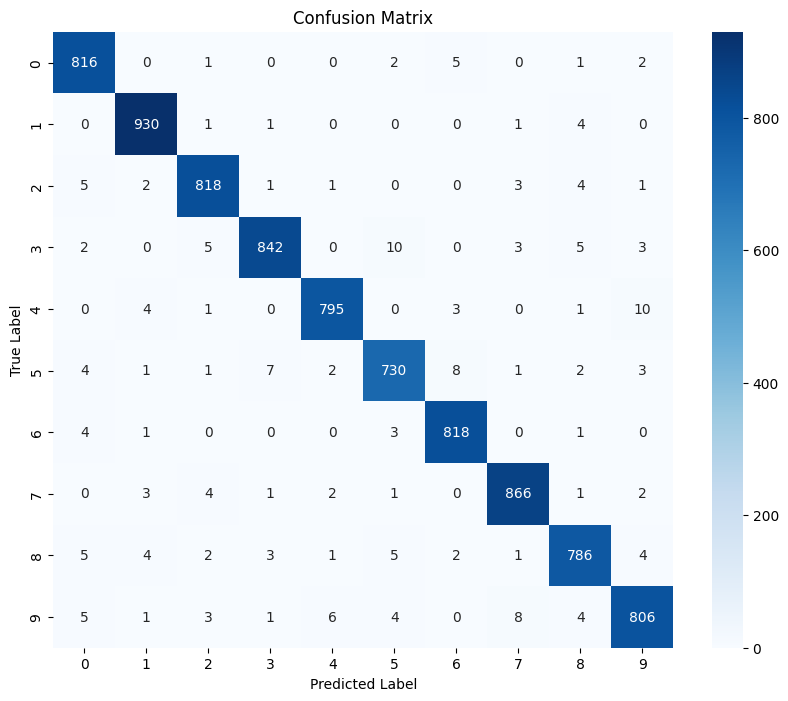


Per-class accuracy:
Digit 0: 98.67%
Digit 1: 99.25%
Digit 2: 97.96%
Digit 3: 96.78%
Digit 4: 97.67%
Digit 5: 96.18%
Digit 6: 98.91%
Digit 7: 98.41%
Digit 8: 96.68%
Digit 9: 96.18%


In [16]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate per-class accuracy
print("\nPer-class accuracy:")
for i in range(10):
    class_acc = cm[i, i] / cm[i].sum() if cm[i].sum() > 0 else 0
    print(f"Digit {i}: {class_acc*100:.2f}%")

## 10. Visualize Predictions

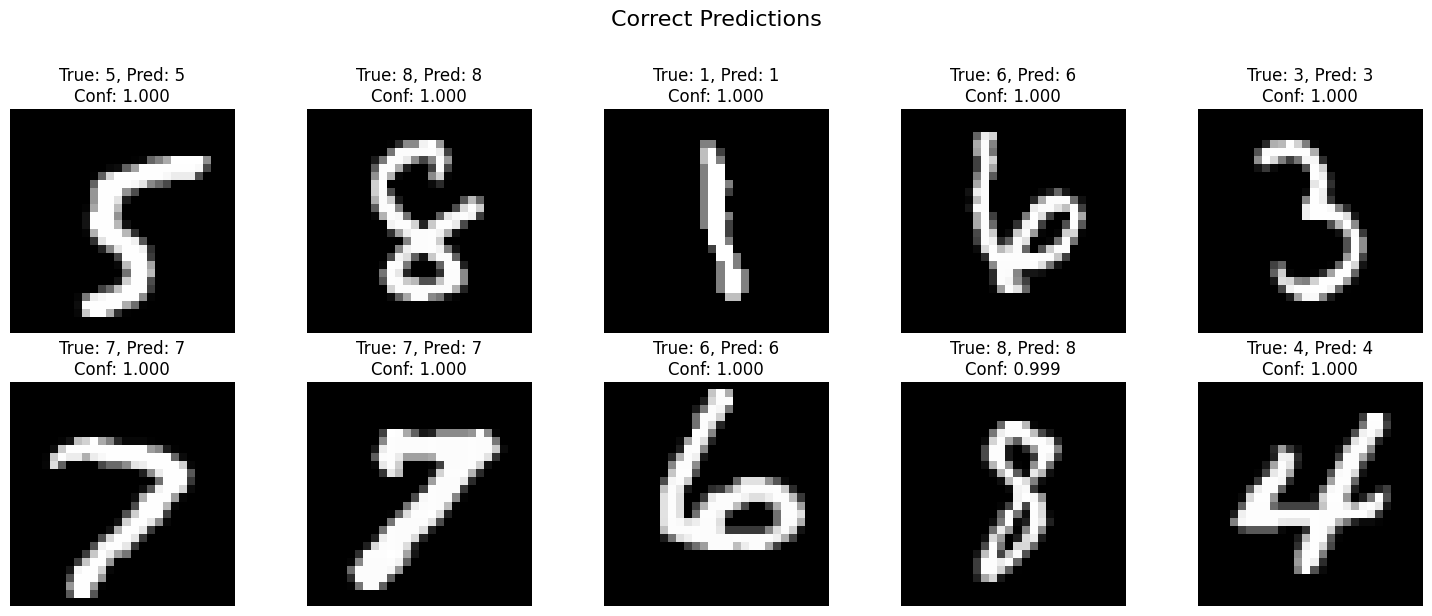

In [17]:
# Show some correct predictions
correct_indices = np.where(y_pred == y_true)[0]
sample_correct = np.random.choice(correct_indices, 10, replace=False)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, idx in enumerate(sample_correct):
    image = X_val.iloc[idx].values.reshape(28, 28)
    true_label = y_true[idx]
    pred_label = y_pred[idx]
    confidence = y_pred_probs[idx][pred_label]
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.3f}')
    axes[i].axis('off')

plt.suptitle('Correct Predictions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

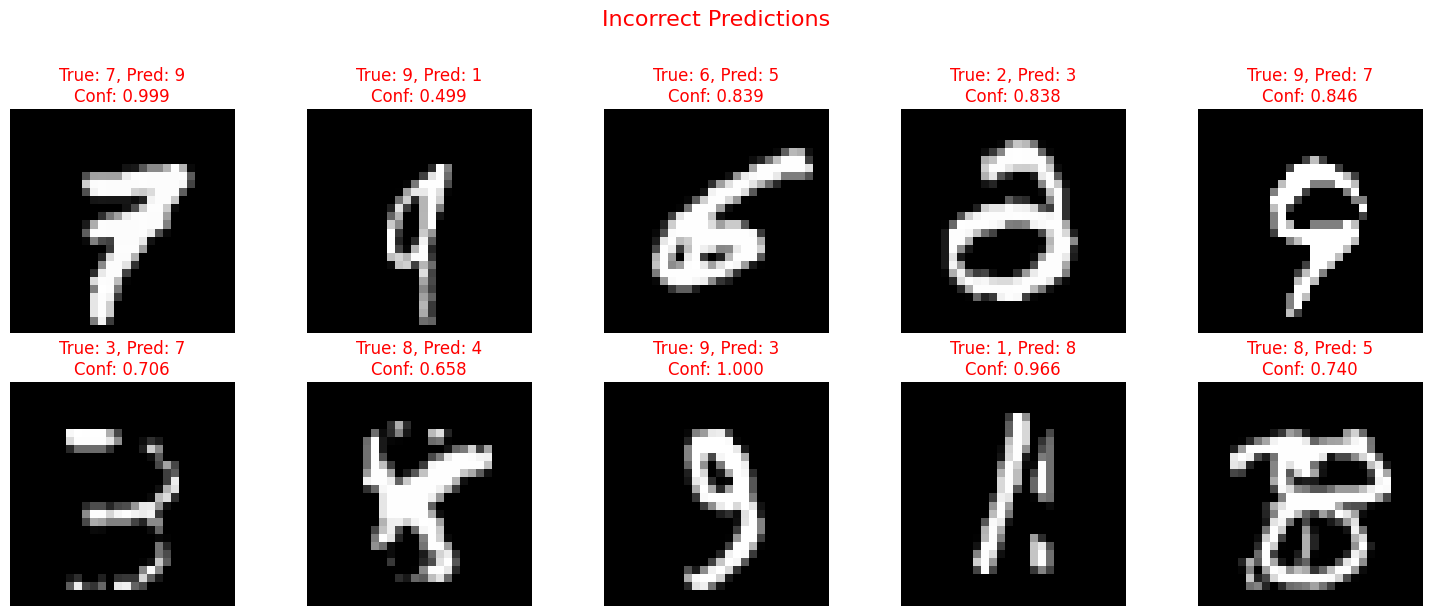

In [18]:
# Show some incorrect predictions
incorrect_indices = np.where(y_pred != y_true)[0]

if len(incorrect_indices) > 0:
    sample_incorrect = np.random.choice(incorrect_indices, min(10, len(incorrect_indices)), replace=False)
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()
    
    for i, idx in enumerate(sample_incorrect):
        image = X_val.iloc[idx].values.reshape(28, 28)
        true_label = y_true[idx]
        pred_label = y_pred[idx]
        confidence = y_pred_probs[idx][pred_label]
        
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'True: {true_label}, Pred: {pred_label}\nConf: {confidence:.3f}', color='red')
        axes[i].axis('off')
    
    # Hide extra subplots if less than 10 errors
    for j in range(len(sample_incorrect), 10):
        axes[j].axis('off')
    
    plt.suptitle('Incorrect Predictions', fontsize=16, y=1.02, color='red')
    plt.tight_layout()
    plt.show()
else:
    print("No incorrect predictions!")

## 11. Test on Actual Test Set

In [19]:
# Load test data
test_data = pd.read_csv('test.csv')
print(f"Test data shape: {test_data.shape}")

# FIX #10: Normalize test data the same way as training data
test_data_normalized = test_data / 255.0

# Make predictions
test_predictions_probs = classifier.predict(test_data_normalized)
test_predictions = np.argmax(test_predictions_probs, axis=1)

print(f"\nTest predictions shape: {test_predictions.shape}")
print(f"Sample predictions: {test_predictions[:10]}")

Test data shape: (28000, 784)


2026-01-03 20:28:26.107610: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 87808000 exceeds 10% of free system memory.


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step

Test predictions shape: (28000,)
Sample predictions: [2 0 9 9 3 7 0 3 0 3]


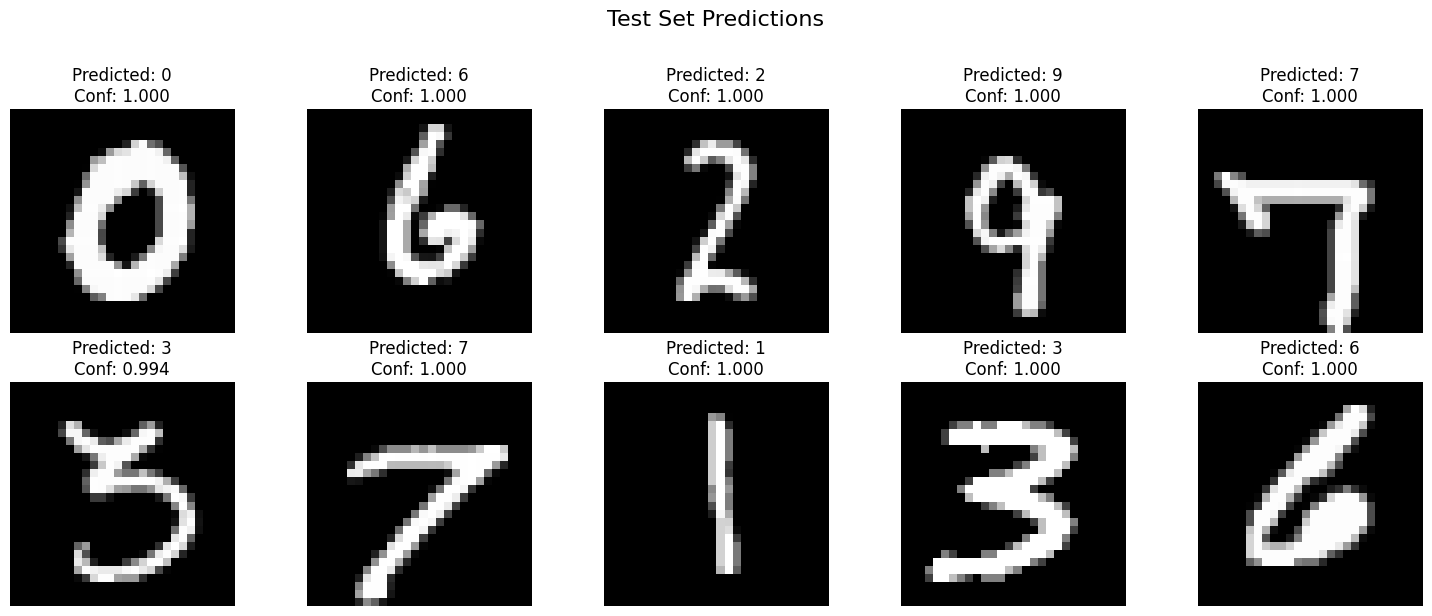

In [20]:
# Visualize some test predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    idx = np.random.randint(0, len(test_data))
    image = test_data.iloc[idx].values.reshape(28, 28)
    pred_label = test_predictions[idx]
    confidence = test_predictions_probs[idx][pred_label]
    
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Predicted: {pred_label}\nConf: {confidence:.3f}')
    axes[i].axis('off')

plt.suptitle('Test Set Predictions', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

## 12. Save the Model

In [21]:
# Save the improved model
classifier.export("models/digit_model_improved/1")
print("Model saved successfully to: models/digit_model_improved/1")

INFO:tensorflow:Assets written to: models/digit_model_improved/1/assets


INFO:tensorflow:Assets written to: models/digit_model_improved/1/assets


Saved artifact at 'models/digit_model_improved/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 784), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  131360783606784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131360783609776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131360784304784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131360784303728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131360784316048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131360784316752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131360782539360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  131360782540064: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model saved successfully to: models/digit_model_improved/1


## 13. Key Differences from Original Model

### What was WRONG in the original model:

1. **No data normalization** - pixels were 0-255 instead of 0-1
2. **Wrong activation function** - sigmoid instead of softmax on output
3. **Wrong loss function** - MSE instead of categorical_crossentropy
4. **Poor optimizer** - basic SGD instead of Adam
5. **Tiny batch size** - 10 instead of 128
6. **No validation split** - couldn't detect overfitting
7. **No evaluation metrics** - couldn't measure true performance
8. **Few epochs** - only 10 epochs of training

### Results comparison:

**Original model predictions:**
```
[0.497, 0.496, 0.497, 0.497, 0.499, 0.498, 0.498, 0.497, 0.497, 0.501]
```
All probabilities ~0.5 = random guessing!

**Improved model predictions:**
Should show clear probabilities like:
```
[0.001, 0.998, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.001]
```
One high probability (~1.0), others near zero = confident prediction!

### Expected accuracy:
- **Original model**: ~10% (random guessing)
- **Improved model**: ~97-98% (actually learned!)